In [66]:
# https://www.kaggle.com/uciml/glass
import numpy as np
from sklearn.model_selection import GridSearchCV
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

print('Done')

Done


# The Purpose
is to try to predict the rainy days basing on the atmospheric pressure changes
I got the data for the year 2021 from this website: http://meteo.ftj.agh.edu.pl/archivalData

# Reading Input Data


In [67]:
DATA = pd.read_csv("input/data2.csv", sep=';')
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8684 entries, 0 to 8683
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   time                        8684 non-null   object 
 1   minPm10                     8433 non-null   float64
 2   averagePm10                 8433 non-null   float64
 3   maxPm10                     8433 non-null   float64
 4   maxWindDirection            8660 non-null   float64
 5   averageWindDirection        8660 non-null   float64
 6   minWindDirection            8660 non-null   float64
 7   maxWindSpeed                8660 non-null   float64
 8   averageWindSpeed            8660 non-null   float64
 9   minWindSpeed                8660 non-null   float64
 10  minAirPressure              8684 non-null   float64
 11  averageAirPressure          8684 non-null   float64
 12  maxAirPressure              8684 non-null   float64
 13  minSeaLevelPressure         8684 


# Exploring the Data, planning the preprocessing


In [68]:
DATA.head()

,time,minPm10,averagePm10,maxPm10,maxWindDirection,averageWindDirection,minWindDirection,maxWindSpeed,averageWindSpeed,minWindSpeed,...,averageHeatindex,maxHeatindex,minDewPointTemperature,averageDewPointTemperature,maxDewPointTemperature,rainAccumulation,rainIntensity,minRelativeHumidity,maxRelativeHumidity,averageRelativeHumidity
0,2021-01-01 00:00:00+01:00,44.3,53.947458,64.4,354.0,337.0,0.0,1.5,0.686667,0.2,...,74.188333,75.3,-3.2,-2.993333,-2.8,0.0,0.0,82.1,82.4,82.235000
1,2021-01-01 01:00:00+01:00,41.9,53.145763,63.7,359.0,343.0,1.0,1.2,0.538333,0.1,...,73.910000,76.0,-3.3,-2.948333,-2.7,0.0,0.0,81.6,82.4,82.020000
2,2021-01-01 02:00:00+01:00,54.3,58.908333,62.8,359.0,350.0,0.0,1.4,0.835000,0.3,...,75.158333,76.1,-3.4,-3.220000,-3.0,0.0,0.0,81.3,82.0,81.585000
3,2021-01-01 03:00:00+01:00,45.4,54.565000,61.6,357.0,355.0,0.0,1.8,0.790000,0.2,...,75.256667,76.6,-3.5,-3.213333,-2.9,0.0,0.0,81.4,82.0,81.663333
4,2021-01-01 04:00:00+01:00,41.3,44.844068,49.6,346.0,272.0,17.0,2.1,0.633333,0.1,...,74.450000,75.9,-3.5,-3.171667,-2.9,0.0,0.0,80.0,81.6,80.871667


In [69]:
DATA['time'] = pd.to_datetime(DATA['time'], format='%Y-%m-%d %H:%M:%S.%f')
DATA.head()

,time,minPm10,averagePm10,maxPm10,maxWindDirection,averageWindDirection,minWindDirection,maxWindSpeed,averageWindSpeed,minWindSpeed,...,averageHeatindex,maxHeatindex,minDewPointTemperature,averageDewPointTemperature,maxDewPointTemperature,rainAccumulation,rainIntensity,minRelativeHumidity,maxRelativeHumidity,averageRelativeHumidity
0,2021-01-01 00:00:00+01:00,44.3,53.947458,64.4,354.0,337.0,0.0,1.5,0.686667,0.2,...,74.188333,75.3,-3.2,-2.993333,-2.8,0.0,0.0,82.1,82.4,82.235000
1,2021-01-01 01:00:00+01:00,41.9,53.145763,63.7,359.0,343.0,1.0,1.2,0.538333,0.1,...,73.910000,76.0,-3.3,-2.948333,-2.7,0.0,0.0,81.6,82.4,82.020000
2,2021-01-01 02:00:00+01:00,54.3,58.908333,62.8,359.0,350.0,0.0,1.4,0.835000,0.3,...,75.158333,76.1,-3.4,-3.220000,-3.0,0.0,0.0,81.3,82.0,81.585000
3,2021-01-01 03:00:00+01:00,45.4,54.565000,61.6,357.0,355.0,0.0,1.8,0.790000,0.2,...,75.256667,76.6,-3.5,-3.213333,-2.9,0.0,0.0,81.4,82.0,81.663333
4,2021-01-01 04:00:00+01:00,41.3,44.844068,49.6,346.0,272.0,17.0,2.1,0.633333,0.1,...,74.450000,75.9,-3.5,-3.171667,-2.9,0.0,0.0,80.0,81.6,80.871667


## Columns


/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


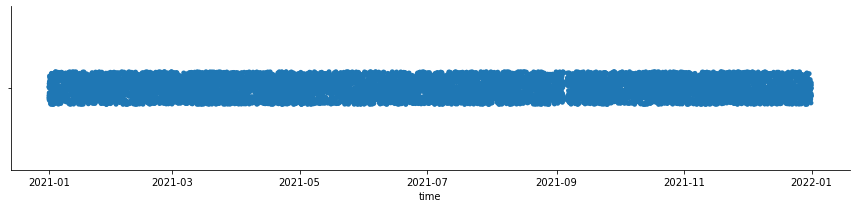

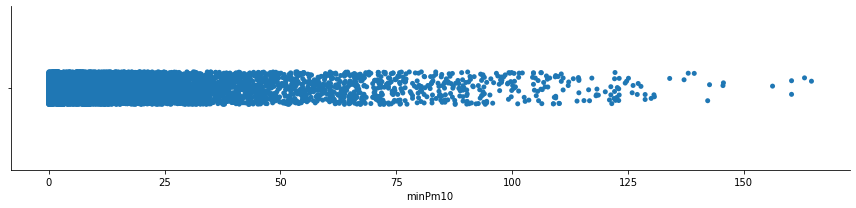

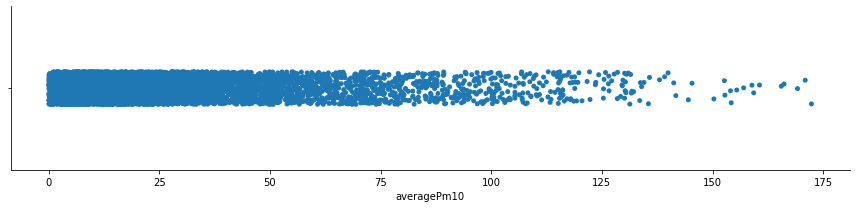

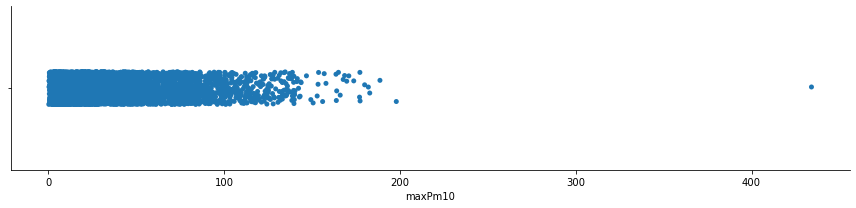

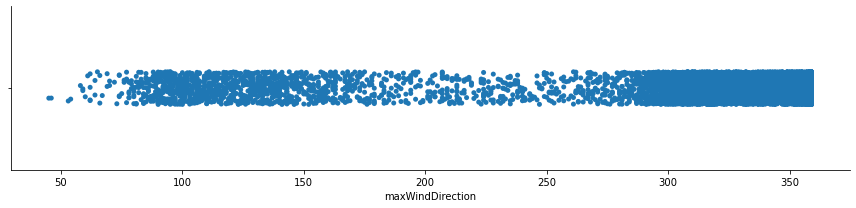

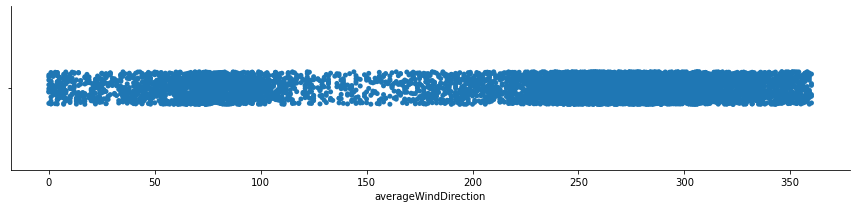

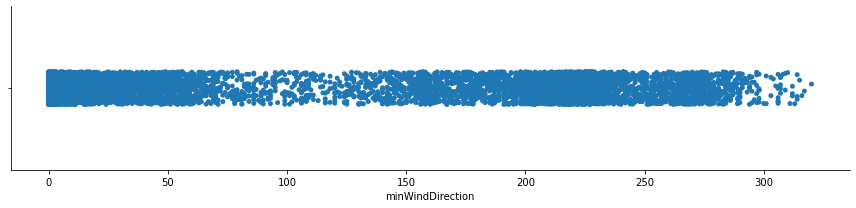

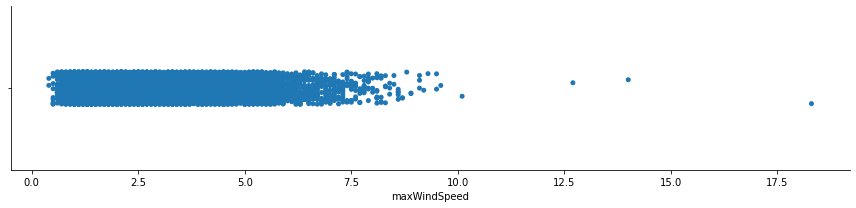

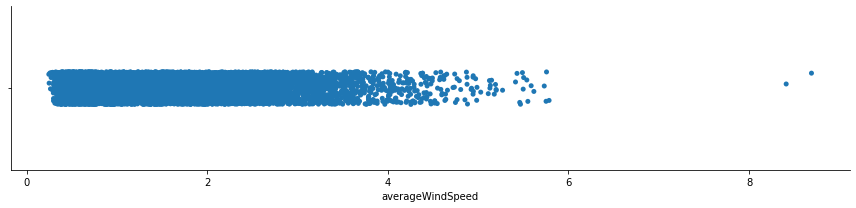

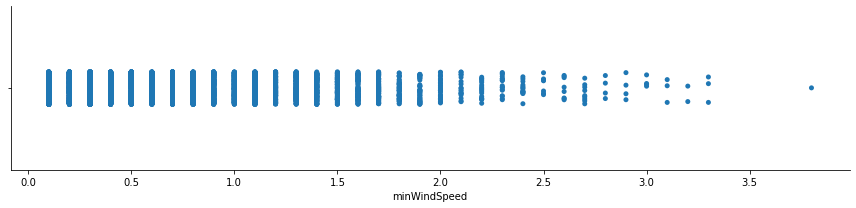

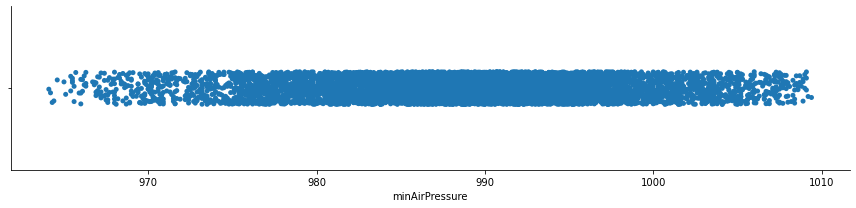

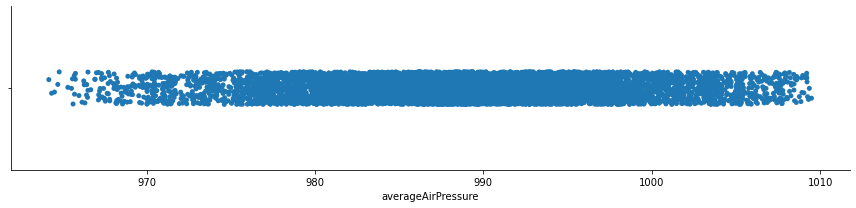

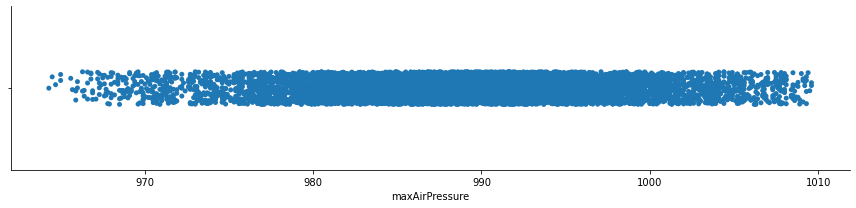

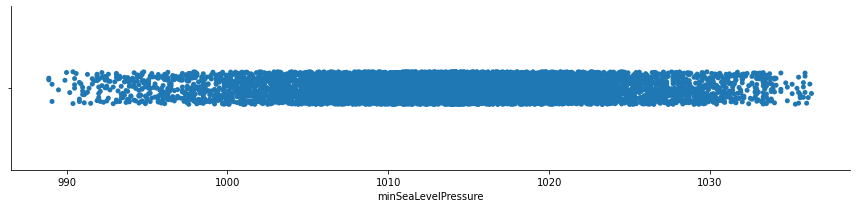

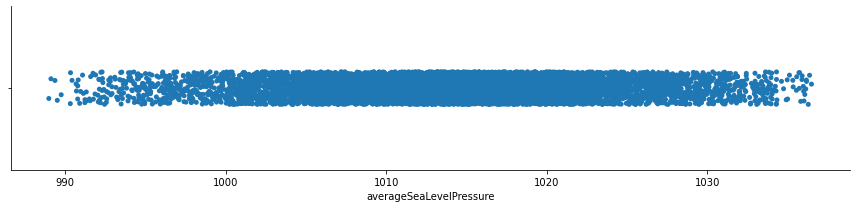

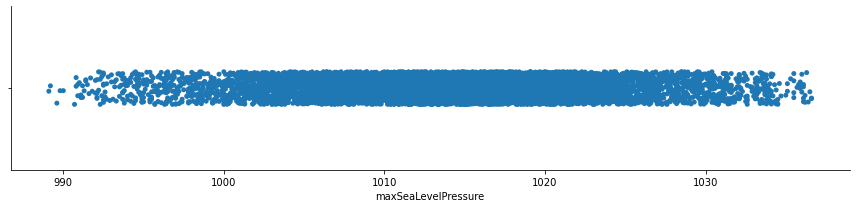

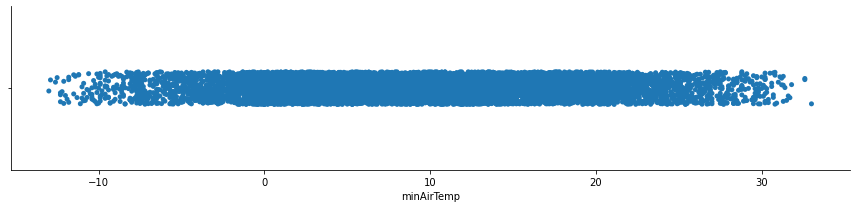

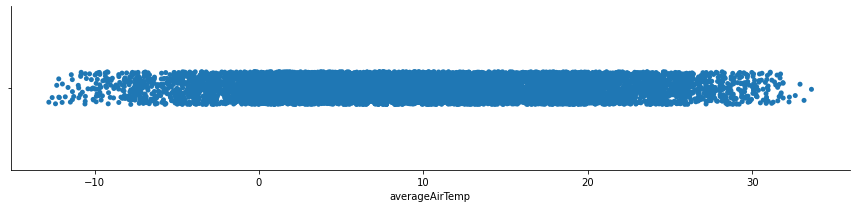

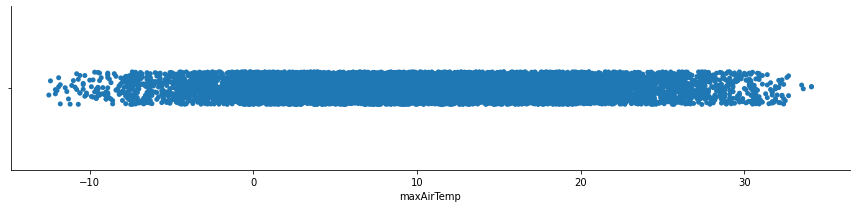

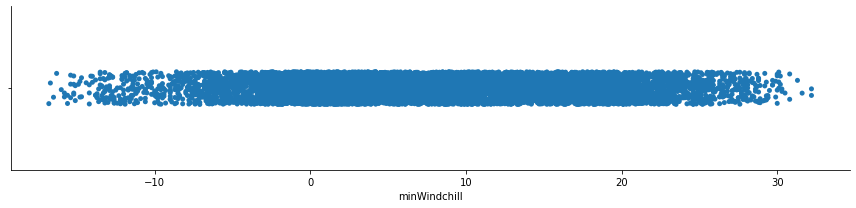

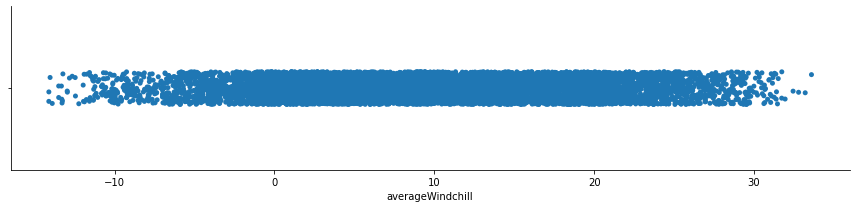

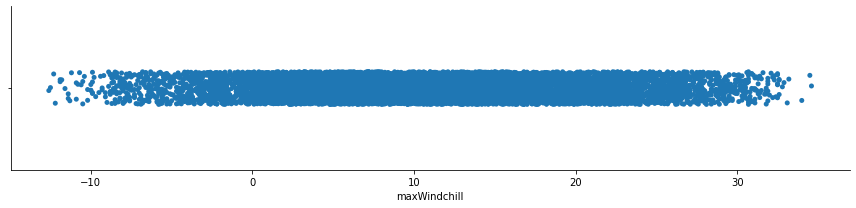

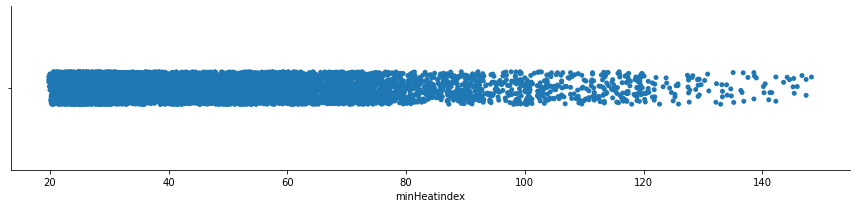

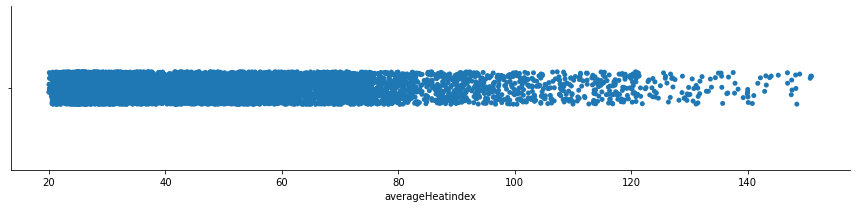

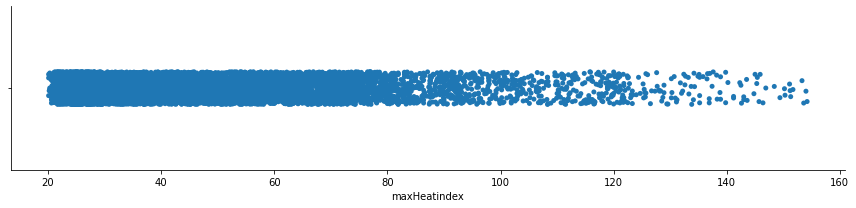

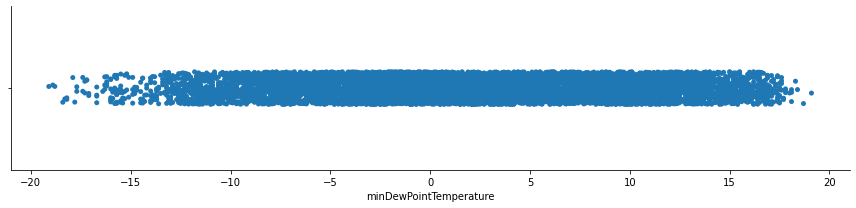

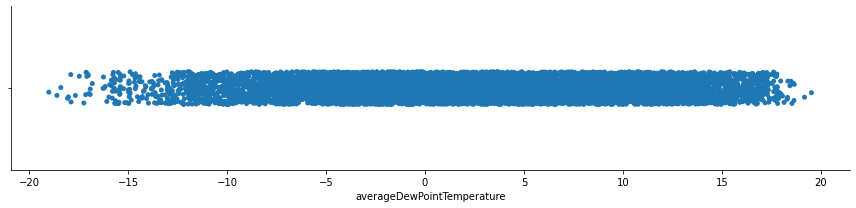

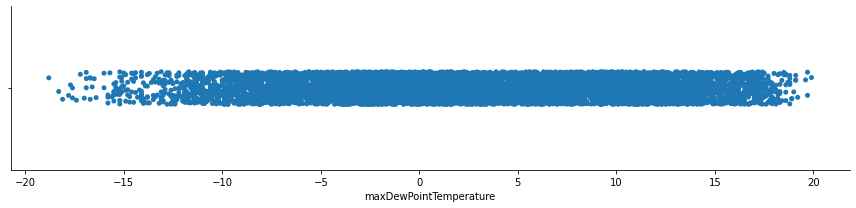

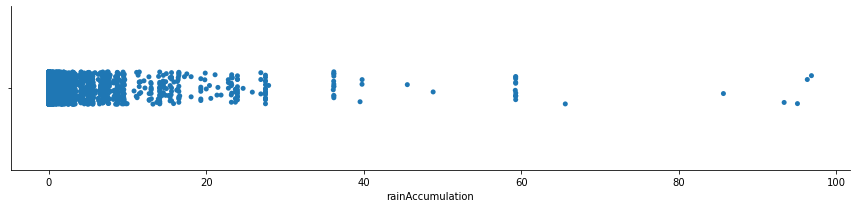

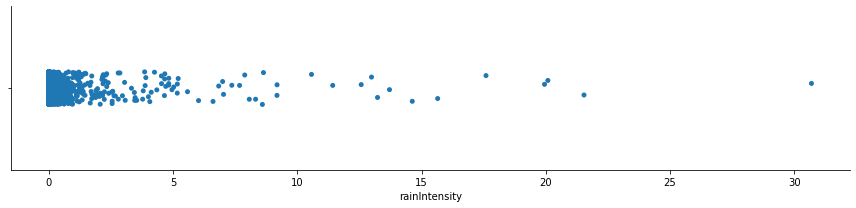

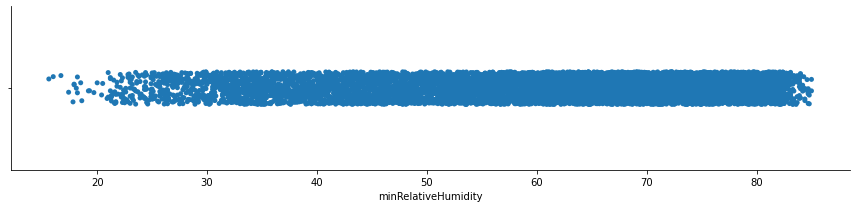

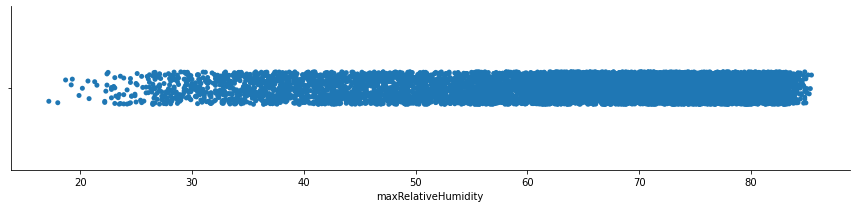

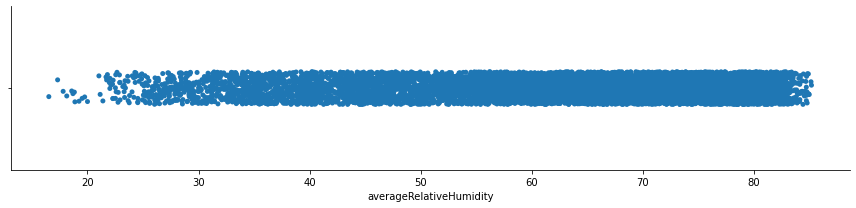

In [70]:
from libs.simpleplotter import simple_features_overview
simple_features_overview(DATA)

# Correlations between data

<AxesSubplot:>

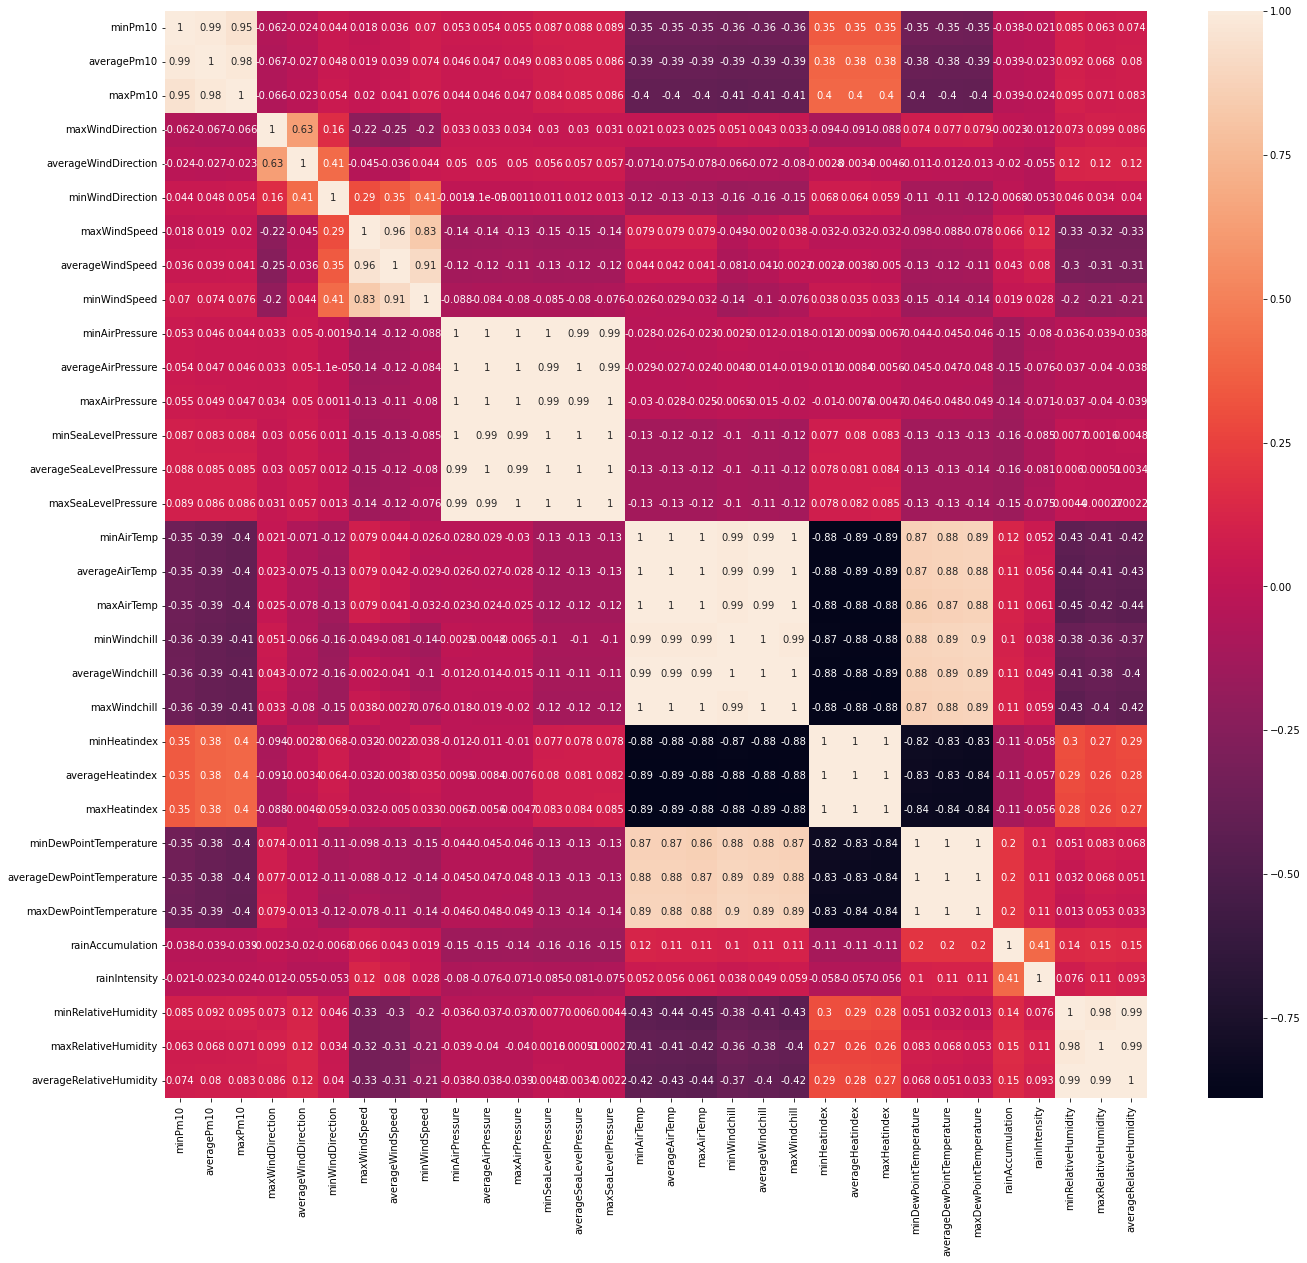

In [71]:
# Heatmap
data_correlations = DATA.corr()
fig, ax = plt.subplots(figsize=(22, 20))
sns.heatmap(data_correlations, annot=True)

##

In [72]:
# from libs.simpleplotter import simple_correlations
# simple_correlations(DATA, "rainIntensity")

## Missing, Categorical & Not Useful Data


In [73]:
DATA.isnull().sum()

time                            0
minPm10                       251
averagePm10                   251
maxPm10                       251
maxWindDirection               24
averageWindDirection           24
minWindDirection               24
maxWindSpeed                   24
averageWindSpeed               24
minWindSpeed                   24
minAirPressure                  0
averageAirPressure              0
maxAirPressure                  0
minSeaLevelPressure             0
averageSeaLevelPressure         0
maxSeaLevelPressure             0
minAirTemp                      0
averageAirTemp                  0
maxAirTemp                      0
minWindchill                    0
averageWindchill                0
maxWindchill                    0
minHeatindex                    0
averageHeatindex                0
maxHeatindex                    0
minDewPointTemperature          0
averageDewPointTemperature      0
maxDewPointTemperature          0
rainAccumulation                0
rainIntensity 

Also, columns: Ticket, Name will be dropped as they have only unique strings, so they can't become Categorical columns
Sex, Embarked - will be converted to Categorical

In [74]:
DATA.describe(include='object')

,time
count,8684
unique,8684
top,2021-01-01 00:00:00+01:00
freq,1



# Data Processing


In [75]:
# Let's run the preprocessing on both train and test data

PROCESSED = DATA.copy(deep=True)

# Filling-up empty records
PROCESSED['minPm10'].fillna(PROCESSED["minPm10"].mean(), inplace=True)
PROCESSED['maxPm10'].fillna(PROCESSED["maxPm10"].mean(), inplace=True)
PROCESSED['averagePm10'].fillna(PROCESSED["averagePm10"].mean(), inplace=True)
PROCESSED['maxWindDirection'].fillna(PROCESSED["maxWindDirection"].mean(), inplace=True)
PROCESSED['averageWindDirection'].fillna(PROCESSED["averageWindDirection"].mean(), inplace=True)
PROCESSED['minWindDirection'].fillna(PROCESSED["minWindDirection"].mean(), inplace=True)
PROCESSED['maxWindSpeed'].fillna(PROCESSED["maxWindSpeed"].mean(), inplace=True)
PROCESSED['minWindSpeed'].fillna(PROCESSED["minWindSpeed"].mean(), inplace=True)
PROCESSED['averageWindSpeed'].fillna(PROCESSED["averageWindSpeed"].mean(), inplace=True)

# copy of the time column, for predictions
time = PROCESSED['time'].copy()
PROCESSED.drop('time', inplace=True, axis='columns')

# I want to use classificators therefore I need to create is_raining column with binary data

PROCESSED['is_rain'] = np.where(PROCESSED['rainAccumulation']>0, 1, 0)

PROCESSED.drop(['rainAccumulation', 'rainIntensity'], inplace=True, axis='columns')


PROCESSED.isnull().sum()

minPm10                       0
averagePm10                   0
maxPm10                       0
maxWindDirection              0
averageWindDirection          0
minWindDirection              0
maxWindSpeed                  0
averageWindSpeed              0
minWindSpeed                  0
minAirPressure                0
averageAirPressure            0
maxAirPressure                0
minSeaLevelPressure           0
averageSeaLevelPressure       0
maxSeaLevelPressure           0
minAirTemp                    0
averageAirTemp                0
maxAirTemp                    0
minWindchill                  0
averageWindchill              0
maxWindchill                  0
minHeatindex                  0
averageHeatindex              0
maxHeatindex                  0
minDewPointTemperature        0
averageDewPointTemperature    0
maxDewPointTemperature        0
minRelativeHumidity           0
maxRelativeHumidity           0
averageRelativeHumidity       0
is_rain                       0
dtype: i

In [76]:
PROCESSED.head(20)

,minPm10,averagePm10,maxPm10,maxWindDirection,averageWindDirection,minWindDirection,maxWindSpeed,averageWindSpeed,minWindSpeed,minAirPressure,...,minHeatindex,averageHeatindex,maxHeatindex,minDewPointTemperature,averageDewPointTemperature,maxDewPointTemperature,minRelativeHumidity,maxRelativeHumidity,averageRelativeHumidity,is_rain
0,44.3,53.947458,64.4,354.0,337.0,0.0,1.5,0.686667,0.2,981.5,...,73.5,74.188333,75.3,-3.2,-2.993333,-2.8,82.1,82.4,82.235000,0
1,41.9,53.145763,63.7,359.0,343.0,1.0,1.2,0.538333,0.1,981.5,...,72.9,73.910000,76.0,-3.3,-2.948333,-2.7,81.6,82.4,82.020000,0
2,54.3,58.908333,62.8,359.0,350.0,0.0,1.4,0.835000,0.3,981.6,...,73.7,75.158333,76.1,-3.4,-3.220000,-3.0,81.3,82.0,81.585000,0
3,45.4,54.565000,61.6,357.0,355.0,0.0,1.8,0.790000,0.2,981.6,...,73.7,75.256667,76.6,-3.5,-3.213333,-2.9,81.4,82.0,81.663333,0
4,41.3,44.844068,49.6,346.0,272.0,17.0,2.1,0.633333,0.1,981.5,...,73.2,74.450000,75.9,-3.5,-3.171667,-2.9,80.0,81.6,80.871667,0
5,34.2,40.349153,44.2,296.0,191.0,136.0,1.8,1.006667,0.3,981.6,...,75.2,76.935000,78.0,-3.8,-3.645000,-3.3,80.2,81.0,80.536667,0
6,30.6,38.265000,42.0,347.0,275.0,24.0,2.1,0.768333,0.2,981.9,...,76.5,77.665000,78.7,-4.0,-3.811667,-3.6,79.7,81.0,80.203333,0
7,33.8,40.026667,44.1,345.0,177.0,50.0,1.9,0.720000,0.2,982.3,...,76.0,76.938333,77.8,-3.9,-3.745000,-3.6,79.3,80.2,79.711667,0
8,24.5,36.284746,42.9,301.0,188.0,104.0,2.4,1.105000,0.1,982.6,...,76.0,77.855000,80.2,-4.4,-3.940000,-3.6,78.6,79.8,79.390000,0
9,29.1,33.984746,37.2,251.0,190.0,147.0,1.9,0.841667,0.2,982.8,...,76.9,78.271667,79.6,-4.3,-4.095000,-3.9,78.1,79.5,78.706667,0



# Post-Processing Data Analysis


<AxesSubplot:>

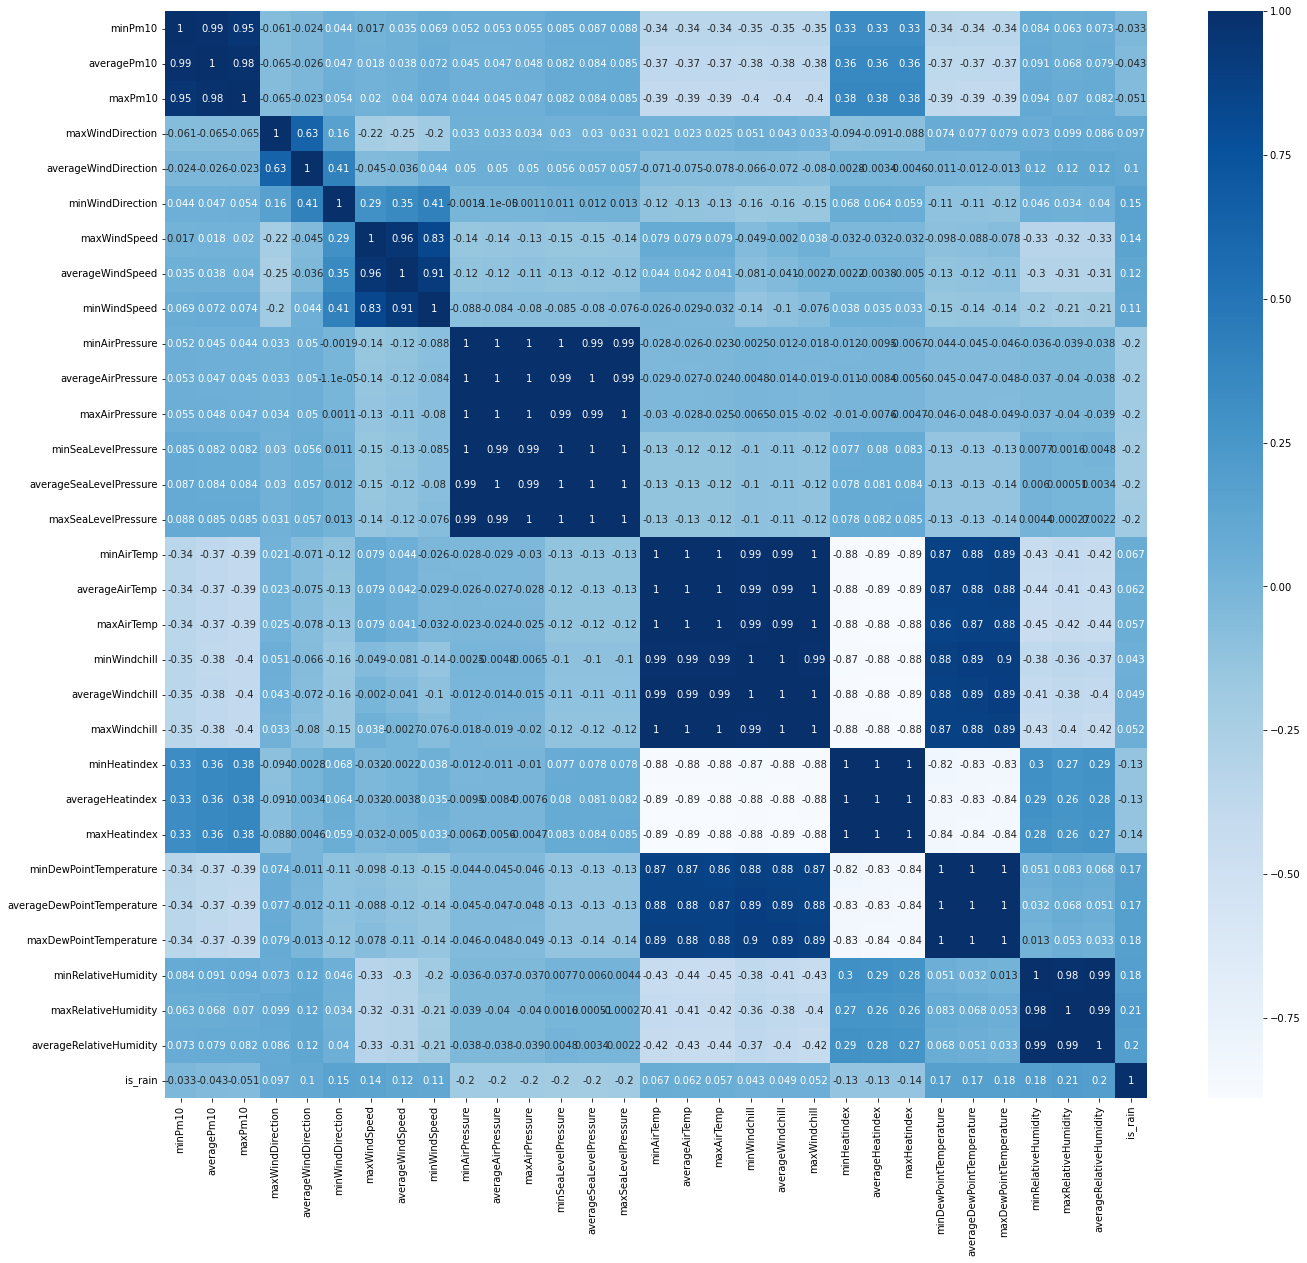

In [78]:
# Heatmap
data_correlations = PROCESSED.corr()
plt.subplots(figsize=(22, 20))
sns.heatmap(data_correlations, cmap = 'Blues', annot=True)

# Preparing for Model Training

## Separating target from features

In [79]:
y = PROCESSED['is_rain']
X = PROCESSED.drop(['is_rain'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8684 entries, 0 to 8683
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   minPm10                     8684 non-null   float64
 1   averagePm10                 8684 non-null   float64
 2   maxPm10                     8684 non-null   float64
 3   maxWindDirection            8684 non-null   float64
 4   averageWindDirection        8684 non-null   float64
 5   minWindDirection            8684 non-null   float64
 6   maxWindSpeed                8684 non-null   float64
 7   averageWindSpeed            8684 non-null   float64
 8   minWindSpeed                8684 non-null   float64
 9   minAirPressure              8684 non-null   float64
 10  averageAirPressure          8684 non-null   float64
 11  maxAirPressure              8684 non-null   float64
 12  minSeaLevelPressure         8684 non-null   float64
 13  averageSeaLevelPressure     8684 

## Splitting train data into train & validation data
as we can see the number of records in train data is lowered

In [80]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=0)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4342 entries, 7353 to 2732
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   minPm10                     4342 non-null   float64
 1   averagePm10                 4342 non-null   float64
 2   maxPm10                     4342 non-null   float64
 3   maxWindDirection            4342 non-null   float64
 4   averageWindDirection        4342 non-null   float64
 5   minWindDirection            4342 non-null   float64
 6   maxWindSpeed                4342 non-null   float64
 7   averageWindSpeed            4342 non-null   float64
 8   minWindSpeed                4342 non-null   float64
 9   minAirPressure              4342 non-null   float64
 10  averageAirPressure          4342 non-null   float64
 11  maxAirPressure              4342 non-null   float64
 12  minSeaLevelPressure         4342 non-null   float64
 13  averageSeaLevelPressure     43

# Models Training & Hyper-params Tuning for Different Classification Models


In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# svc=SVC(probability=True, kernel='linear')
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier

# helper function to retrieve model name from model object
from libs.simple_processing import get_model_name

params = [
    {
        'model': KNeighborsClassifier(),
        'hyperparams': {
            'n_neighbors': range(16, 20, 1),
            'n_jobs': range(4, 5, 1)
        }
    },
    # {
    #     'model': DecisionTreeClassifier(),
    #     'hyperparams': {
    #         'max_depth': [1, 2, 3, 4, 5]
    #     }
    # },
    # {
    #     'model': RandomForestClassifier(n_jobs=4, max_features="auto", bootstrap=False),
    #     'hyperparams': {
    #         'criterion' :['gini', 'entropy'],
    #         'n_estimators': range(100, 300, 50),
    #         'n_jobs': range(4, 5, 1),
    #         'max_depth': range(6, 9, 1)
    #     }
    # },
    {
        'model': GradientBoostingClassifier(random_state=0, max_features="auto"),
        'hyperparams': {
            'n_estimators': range(15, 25, 1),
            'learning_rate': np.arange(0.01, 0.1, 0.01),
            'max_depth': range(1, 5, 1)
        }
    }
]

grid_model = {}

# also tried to use cv=4 and 6-15 but it made results worse
for p in params:
    print('> Model:', get_model_name(p['model']))
    grid_model = GridSearchCV(p['model'], p['hyperparams'], cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
    grid_model.fit(X_train, y_train)
    print('Best params:', grid_model.best_params_)
    print('Best score:', grid_model.best_score_)


print('Done.')

> Model: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best params: {'n_jobs': 4, 'n_neighbors': 16}
Best score: 0.7397482672492881
> Model: GradientBoostingClassifier
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best params: {'learning_rate': 0.09, 'max_depth': 4, 'n_estimators': 24}
Best score: 0.7620884219904228
Done.


# Hyper-params Tuning Summary


## The Winner

In [90]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
pred_results = pd.DataFrame({'y_valid' : y_valid, 'y_pred': y_pred})
pred_results

,y_valid,y_pred
3202,1,1
8182,0,0
6662,0,0
4098,0,0
2602,1,1
...,...,...
3035,1,1
4536,0,0
6627,1,0
630,0,0


In [92]:
model = GradientBoostingClassifier(learning_rate=0.09, max_depth=4, n_estimators=24)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
pred_results = pd.DataFrame({'y_valid' : y_valid, 'y_pred': y_pred})

pred_results

,y_valid,y_pred
3202,1,1
8182,0,0
6662,0,0
4098,0,0
2602,1,1
...,...,...
3035,1,1
4536,0,0
6627,1,0
630,0,0


## Score
Accuracy score / Dokładność [(TP+TN) / (TP+TN+FP+FN)]: how many of the values were predicted correctly?
Accuracy count: number of correct predictions
Precision score / Precyzja [TP / (TP+FP)]: how many passengers that the model thought survived actually did survive?
Recall score / Pełność [TP / (TP+FN]: how many of the actual survivors the model correctly predicted?
(also known as true positive rate / wskaźnik skuteczności - ryzyko niepoprawnego oznaczenia ofiary wypadku)
F1 score [2(prec x rec) / (prec + rec)]: combination of the above precision and recall scores

In [93]:
from libs.simple_processing import print_scores

print_scores(y_valid, y_pred)

Accuracy score:  0.7586365730078305
Accuracy count:  3294 / 4342
Precision score:  0.7503017589386511
Recall score:  0.7586365730078305
F1 score:  0.7385472616680102



## Receiver Operating Characteristic (ROC)

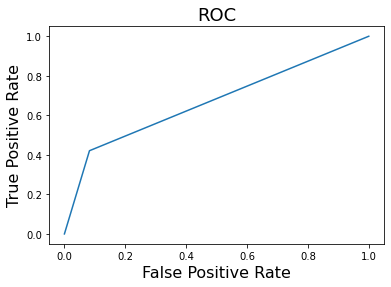

In [94]:
from libs.simpleplotter import simple_roc

simple_roc(y_valid, y_pred)

## Confusion Matrix / Macierz pomyłek

Now, let's take a look at the results

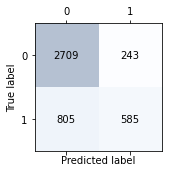

In [95]:
from libs.simpleplotter import simple_confusion_matrix
# conf_matrix = confusion_matrix(y_true=y_valid, y_pred=y_pred)
# conf_matrix
conf_matrix = simple_confusion_matrix(y_valid, y_pred, model.classes_)

In [87]:
# crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_valid)
print('TP:', conf_matrix[1][1])
print('TN:', conf_matrix[0][0])
print('FP:', conf_matrix[0][1])
print('FN:', conf_matrix[1][0])

TP: 0
TN: 2952
FP: 0
FN: 1390


## Which features became decision makers for the model?

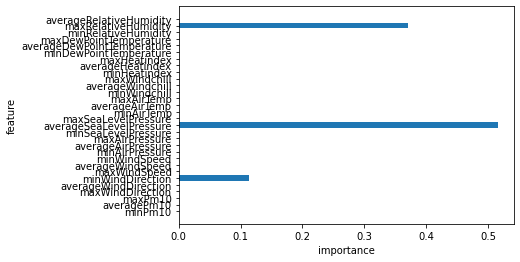

In [88]:
from libs.simpleplotter import feature_importance

feature_importance(model, X_train)

# Generating Model Predictions For Test Data & Saving the results for Kaggle Competition

In [89]:
# y_test = model.predict(X)
# output = pd.DataFrame({'Id': IDs, 'Species': y_test})
# output.to_csv('./submission.csv', index=False)
# SUBMISSION = pd.read_csv("./submission.csv")
# SUBMISSION